# Ensembles

We will be running the following ensembles in this notebook: 
- 3333333
- 3313333 
- 3331333
- 3333331
- 2233223
- 2213223
- 2231223
- 2233221
- 2211221
- 1111111

Stipulations for ensembles:
- no seasonality
- run monthly
- Aquaseca's notebook was our base model

Parameter Values
- 1. K1, K2, and K3 = [5, 25, 100] # baseline Kx=Ky=Kz value in all zones (m/day)
- 2. Kz ratio_lowK = [1e-6, 1e-2, 1] # ratio of Kz in low-K layer to baseline K (-)
- 3. Sy = [0.05, 0.1, 0.3] # specific yield (-)
- 4. R_mountains = [1e-5, 3e-5, 5e-5] # recharge rate in mountains (m/day)
- 5. ET_valley = [1e-6, 1e-5, 1e-4] # ET rate in valley (m/day)
- 6. ETratio_riparian = [1, 2, 3] # ratio of ET in riparian area to ET rate in valley (m/day)
- 7. Kratio_streambed = [1e-2,1e-1, 1] # ratio of K in streambed to baseline K (-)


# 1. Packages

In [144]:
#import packages
import flopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import os
import csv

#additional analysis tools
import flopy.utils.binaryfile as bf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
np.set_printoptions(threshold=np.inf)

#jupyter specific--included to show plots in notebook
%matplotlib inline 

run = 'n'
if run == 'y':
    file_extensions = ['.dis','.bas','.lpf','.oc','.pcg','.wel']
    for ext in file_extensions:
        os.remove(modelname + ext)

 ## Name of run and Parameter Inputs

In [ ]:
ensembles = [[3,3,3,3,3,3,3],
[3,3,1,3,3,3,3], 
[3,3,3,1,3,3,3],
[3,3,3,3,3,3,1],
[2,2,3,3,2,2,3],
[2,2,1,3,2,2,3],
[2,2,3,1,2,2,3],
[2,2,3,3,2,2,1],
[2,2,1,1,2,2,1],
[1,1,1,1,1,1,1]]

ensemble_num = ensembles[9]#change ensemble here
#print(ensemble_num)

barley = 0 #if 1 then crops are switched
wellmove = 0 # if 1 then well is moved


name = "ensemble_"
for i in range(len(ensemble_num)):
    string = str(ensemble_num[i])
    name = name + string 
    if(barley == 1 ):
        name = name + 'b'
    elif(wellmove == 1):
        name = name + 'w'
    
print(name)

# 2. Discretization and other inputs

In [145]:
# Discretization
nrow = 50 #number of rows
ncol = 50 #number of columns
nlay = 3  #number of layers

dx= 1000 #width of grid cells in x direction 
dy= 1000 #width of grid cells in y direction 
Lx = ncol*dx  #width of domain in x
Ly = nrow*dy #width of domain in y

#ztop = 100
ztop = np.genfromtxt('base_model_elevs.csv', delimiter=',', dtype=float)   # top elevation of top layer (import from csv file) (dim: nrow,ncol)
#print(type(ztop))
#print(ztop.shape)
#print(ztop[0,:])
zbot = 0.     #bottom elevation


## Subsurface properties
n = 0.1        #assign porosity
Ss = 0.0001      #assign storage coefficient
uncnf = 1       #0=confined, >0 = unconfined


#supply well
pumping = 0 #m3/day 
well_xy= [38000, 29000] #xy location of well 
well_row = np.floor((nrow)-(well_xy[1]/dy)) #convert the y location to a row
well_col=np.floor(well_xy[0]/dx) #convert the x location to a column
well_row = 29
well_col = 37
well_loc = (0,well_row, well_col)
well = [2,well_row, well_col, pumping] #Well loc shoudl be layer, row, column
print("well1 location(layer, col, row)", well_row, well_col)


#MW1
pumping2 = 0 #m3/day 
well2_xy= [25000, 25000] #xy location of well 
well2_row = np.floor((nrow)-(well2_xy[1]/dy)) #convert the y location to a row
well2_col=np.floor(well2_xy[0]/dx)-1 #convert the x location to a column
well2_loc = (0,well2_row, well2_col)
well2 = [0,well2_row, well2_col, pumping2] #Well loc shoudl be layer, row, column
print("well2 location(layer, col, row)", well2_row, well2_col)

#MW2
pumping3 = 0 #m3/day 
well3_xy= [12500, 12500] #xy location of well 
well3_row = np.floor((nrow)-(well3_xy[1]/dy)) #convert the y location to a row
well3_col=np.floor(well3_xy[0]/dx) #convert the x location to a column
well3_loc = (0,well3_row, well3_col)
well3 = [0,well3_row, well3_col, pumping3] 
print("well3 location(layer, col, row)", well3_row, well3_col)


#irrigation well
if (barley == 1):
    pumping4 = -3000
else:
    pumping4 = -4500 #m3/day
    
if (wellmove == 1): 
    well4_row = 19
else:  
    well4_row = 38 
well4_col = 12 
well4_loc = (0,well4_row, well4_col)
well4 = [0,well4_row, well4_col, pumping4] 
print("well4 location(layer, col, row)", well4_row, well4_col)

#wel_spd = {0: [well, well2, well3, well4]}
#print(len(wel_spd))


## Timing
# nper = 1 #number of stress periods 
# steady = [True] #list noting the stress period type

well1 location(layer, col, row) 29 37
well2 location(layer, col, row) 25.0 24.0
well3 location(layer, col, row) 37.0 12.0
well4 location(layer, col, row) 38 12


ensemble_1111111


## 2.1 Parameters that change

### Specific yield

In [147]:
if ensemble_num[2] == 1:
    Sy = 0.05  #lowest   #assign specific yield
elif ensemble_num[2] == 2:
    Sy = 0.1
else:
    Sy = 0.3   #highest
print(Sy)

0.05


### Recharge

In [148]:
#R_mountains = [1e-5, 3e-5, 5e-5]
if ensemble_num[3] == 1:
    rech=1e-5  #m/d #lowest   #assign specific yield
elif ensemble_num[3] == 2:
    rech=3e-5
else:
    rech=5e-5  #m/d

#print(rech)
rechxy=[(0,0),(0,36000)]  #recharge zone

rech_rows_forced = (1.0, 49.0) #rech zone forced for leftmost 15 cols
rech_cols_forced = (1.0, 15.0)

agrech_rows_forced = (28.0, 30.0) #rech zone forced for leftmost 15 cols
agrech_cols_forced = (18.0, 20.0)
agrech = 0.00015  #pistachios (1/8th area already included)

# rech_zone_forced = np.zeros((1, nrow,ncol))
# rech_zone_forced[0, int(rech_rows_forced[0]):int(rech_rows_forced[1]),int(rech_cols_forced[0]):int(rech_cols_forced[1])]=rech
# rech_zone_forced[0, int(agrech_rows_forced[0]):int(agrech_rows_forced[1]),int(agrech_cols_forced[0]):int(agrech_cols_forced[1])]=agrech

# rech_rows=(np.floor(nrow-rechxy[1][1]/dy),np.floor(nrow-rechxy[0][1]/dy))
# rech_cols=(np.floor(rechxy[0][0]/dx),np.floor(rechxy[1][0]/dx))
# #rech_zone=np.zeros(1,nrow,ncol)
# #rech_zone[0,int(rech_rows[0]):int(rech_rows[1]),int(rech_cols[0]):int(rech_cols[1])]=rech
# print("recharge location(col, row)", rech_cols,rech_rows)

sp_peryr = 1   #number of seasons (with and wihtout ET. April-Sept and Oct-Mar)
sp_len = 360  #sp lengths
sim_years = 300
nper = int(sp_peryr*sim_years)+1

rech_zone_forced = np.zeros((1, nrow,ncol))
rech_zone_forced[0, int(rech_rows_forced[0]):int(rech_rows_forced[1]),int(rech_cols_forced[0]):int(rech_cols_forced[1])]=rech
rech_zone_with_ag = np.zeros((1, nrow,ncol))
rech_zone_with_ag[0, int(rech_rows_forced[0]):int(rech_rows_forced[1]),int(rech_cols_forced[0]):int(rech_cols_forced[1])]=rech
rech_zone_with_ag[0, int(agrech_rows_forced[0]):int(agrech_rows_forced[1]),int(agrech_cols_forced[0]):int(agrech_cols_forced[1])]=agrech


rech_dict = {}

for i in range(nper):    #loop over stress periods, odds are 0 ET, evens are reg ET
    if i <= 199:
        rech_dict[i] = rech_zone_forced
        #print(i)
    elif i > 199:  
        #print(i)
        rech_dict[i] = rech_zone_with_ag



### K values

In [149]:
## K for layers 1 and 3 
if ensemble_num[0] == 1:
    K_horiz = 5 #m/d
    K_vert = 5 #m/d
elif ensemble_num[0] == 2:
    K_horiz = 25 #m/d
    K_vert = 25 #m/d
else:
    K_horiz = 100 #m/d
    K_vert = 100 #m/d
    
    
#Kzratio_lowK = [1e-6, 1e-2, 1] # ratio of Kz in low-K layer to baseline K (-)
if ensemble_num[1] == 1:
    K_horiz2 = K_horiz*1e-6 #m/d
    K_vert2 = K_vert*1e-6 #m/d
elif ensemble_num[1] == 2:
    K_horiz2 = K_horiz*1e-2 #m/d
    K_vert2 = K_vert*1e-2 #m/d
else:
    K_horiz2 = K_horiz*1 #m/d
    K_vert2 = K_vert*1 #m/d
    

## K for layer 2
# Kvert1 = 0.000001 #m/d  #K for the middle layer 
# Kvert2 = 0.01 #m/d
# Kvert3 = 1 #m/d

## make horizontal K np arrays
Kh = np.zeros((nlay,nrow,ncol))     # define an array of zeros the size of the model grid (nlay, nrow, ncol)
Kh[:,:,:] = K_horiz # assign the original value to the entire array

## Make a arrays for the K values
Kz = np.zeros((nlay,nrow,ncol))     # define an array of zeros the size of the model grid (nlay, nrow, ncol)
Kz[:,:,:] = K_vert                   # assign the original value to the entire array
Kz[1,:,20:49] = K_vert2            #Replace K in the middle layer with the lower value
#Kz[1,:,:] = K_vert2
#print(K_horiz)
#print(Kz)

## Make some changes to the parameters
bot_elev = 0.
mid_elev = 40.
top_elev = 45.

botm = np.zeros((nlay,nrow,ncol)) # initialize array of zeros for bottom elevation for each model cell (dim: nlay,nrow,ncol)
botm[2,:,:] = bot_elev                 # bottom elevation of lowest layer (2) is 0 m
botm[1,:,:] = mid_elev                 #bottom elevation of middle layer (1) is 40 m           
botm[0,:,:] = top_elev                 # bottom elevation of top layer (0) 45 
print(K_horiz,K_vert, K_horiz2, K_vert2)

5 5 4.9999999999999996e-06 4.9999999999999996e-06


### Stream K

In [150]:
riv_row= 24
riv_sp = [] #create list to store all river cells for stress period 1


#Kratio_streambed = [1e-2,1e-1, 1] # ratio of K in streambed to baseline K (-)
if ensemble_num[6] == 1:
    k_rivbott = K_vert*0.01
elif ensemble_num[6] == 2:
    k_rivbott = K_vert*0.1
else:
    k_rivbott = K_vert*1


# k_rivbott1 = 0.01 #river bottom hydraulic conductivity in m/d
# k_rivbott3 = 1 #river bottom hydraulic conductivity in m/d
# # Kratio_streambed = [1e-2,1e-1, 1]

sed_thick = 1 #thickness of riverbed sediment in m
cond = k_rivbott*(1)*(1000)/(sed_thick) #river bed conductance in m^2/d
r_stage = .5 #stage in river (stress period 1)
r_bott = ztop[riv_row,:] #river bottom
#print(r_bott)
for i in range(1,ncol):
    riv_sp.append([0, riv_row, i, r_bott[i]-1+sed_thick+r_stage, cond, r_bott[i]-2])
    
#print(riv_spd)
#create dictionary of stress period data
riv_spd = {0: riv_sp}
#print(riv_spd)

## 2.2 Stressperiods

In [151]:

nper = 301
#setup the steady state array
steady = np.ones(nper, dtype=bool)*False     # steady-state or transient flag for each stress period (boolean array)
#print(steady)
steady[0] = True    # initial stress period is steady-state

#make an array of period lengths
perlen=np.tile([sp_len],sim_years)
perlen=np.append(100,perlen) #add a period of length 10 at the start for the steady state simulation
#print("Period lengths", perlen)

#make an nstp array for the # of time steps to solve within each period in this case we will do daily 

nstp=perlen/30 #30 for monthly
#nstp[0]=1 #for the steady state solution we just want one output
nstp = nstp.astype(int)
#print("Number of Steps", nstp)


## Boundary conditions
h_right = 70

### Pumping and burnin

In [152]:
wel_spd = {}    
    
burn = 100 #0 because of the head file read in
decade = 1
#decade2 = 10 #to calculate pumping after 100 year pumping
pump = 47
pumpingag4 = -4500
#total pumping = 
for strper in range(0, nper):    
    if strper < burn:
        pumping = 0
        wel_spd[strper] = [[2,well_row, well_col, pumping], [0, well4_row, well4_col, 0]]
    elif strper < (burn + 100):
        if strper < (burn+decade*10):
            pumping = round(pump * (decade**1.5)) *-1
            wel_spd[strper] =  [[2,well_row, well_col, pumping], [0, well4_row, well4_col, 0]]
        else:
            decade = decade + 1   
            pumping = round(pump * (decade**1.5)) *-1
            wel_spd[strper] =  [[2,well_row, well_col, pumping], [0, well4_row, well4_col, 0]]
    else:
        if strper < (burn+decade*10):
            pumping = round(pump * (decade**1.5)) *-1
            wel_spd[strper] =  [[2,well_row, well_col, pumping], [0, well4_row, well4_col, pumpingag4]]
        else:
            decade = decade + 1   
            pumping = round(pump * (decade**1.5)) *-1
            wel_spd[strper] =  [[2,well_row, well_col, pumping], [0, well4_row, well4_col, pumpingag4]]
    
#print(wel_spd)
#print(wel_spd)

### ET

In [153]:
## ET

# ET_valley = [1e-6, 1e-5, 1e-4] # ET rate in valley (m/day)
# ETratio_riparian = [1, 2, 3] # ratio of ET in riparian area to ET rate in valley (m/day)

#ET_valley = [1e-6, 1e-5, 1e-4] # ET rate in valley (m/day)
if ensemble_num[4] == 1:
    ET = 1e-6 #m/day
elif ensemble_num[4] == 2:
    ET = 1e-5 #m/day
else:
    ET = 1e-4 #m/day

# ETratio_riparian = [1, 2, 3] # ratio of ET in riparian area to ET rate in valley (m/day)
if ensemble_num[5] == 1:
    rip_ET = ET #m/day
elif ensemble_num[5] == 2:
    rip_ET = ET*2 #m/day
else:
    rip_ET = ET*3 #m/day
    

ET_locxy=[[24000,0], [0, 0]] #lower left and upper right corners of ET in xy coordinate
rip_ET= 5e-5  #riparian zone


rip_locxy= [[0,21000],[23000,0]]
extinction_depth = 10 #m
#print(ET_locxy)
#print(rip_loc)


ET_rows_forced=(1.0, 49.0) #me forcing the et_rows to be 0-50
ET_cols_forced = (26.0, 49.0)

ET_zone = np.zeros((1,nrow,ncol))     # define an array of zeroes the size of the model grid
ET_zone[0,int(ET_rows_forced[0]):int(ET_rows_forced[1]), int(ET_cols_forced[0]):int(ET_cols_forced[1])] = ET 
#print("ET location(col, row)", ET_cols,ET_rows)
#print("ETrows_forced:", ET_rows_forced)
#print("ETrows:", ET_rows)
#print("ETcols:", ET_cols)
#print("ETrows2:", ET_rows2)
#print("ETcols2:", ET_cols2)

rip_rows_forced = (21.0, 28.0)  #forced riparian area
rip_cols_forced = (1.0, 49.0)




rip_zone = np.zeros((nlay,nrow,ncol))     # define an array of zeroes the size of the model grid
ET_zone[0,int(rip_rows_forced[0]):int(rip_rows_forced[1]), int(rip_cols_forced[0]):int(rip_cols_forced[1])] = rip_ET 
#print("Riparian location(col, row)", rip_cols,rip_rows)       



ET_dict = {} #set up an ET dictionary, where each key is a stress period num 0-50
#ET_zone2 = ET_zone * 0 

for p in range(0,nper):    #loop over stress periods, odds are 0 ET, evens are reg ET
    ET_dict[p] = ET_zone
    #print(ET_dict)
# for p in range(0,nper):    #loop over stress periods, odds are 0 ET, evens are reg ET
#     if p == 0:
#         ET_dict[p] = ET_zone
#     elif p % 2) != 0:
#         ET_dict[p]=ET_zone2
#         #print(p)
#     else: 
#         ET_dict[p] = ET_zone

# #No steady state test
# for p in range(0,nper):    #loop over stress periods, odds are 0 ET, evens are reg ET
#     if p == 0:
#         ET_dict[p] = ET_zone2
#     elif int(p % 2) != 0:
#         ET_dict[p]=ET_zone
#         #print(p)
#     else: 
#         ET_dict[p] = ET_zone2

## 2.3 Ibounds

In [154]:
#read in burn-in head values
print(os.getcwd())
# H_init = np.ones((nlay, nrow, ncol), dtype=np.float32) 
# H_init[0,:,:] = np.loadtxt('postdev_toplayer_h_init.csv', delimiter=",")
# H_init[1,:,:] = np.loadtxt('postdev_midlayer_h_init.csv', delimiter=",")
# H_init[2,:,:] = np.loadtxt('postdev_botlayer_h_init.csv', delimiter=",")
# print(H_init[2,:,1])

H_init = np.ones((nlay, nrow, ncol), dtype=np.float32)  #float array (i.e. decimal), sets all heads to 1.0
H_init[:, :, :] = h_right  #initialize the entire domain to the right head value
H_init[:, :, 49] = h_right    #replace first (right) col with desired head value

#Define cell activity (IBOUND)
ibound=np.ones((nlay,nrow,ncol))                                                  
ibound[:,:,0] = 0  #1st col = no flow       
ibound[:,:,49] = -1  #last col = constant head 

ibound[:,0,:49]=0
ibound[:,49,:49]=0
ibound[:,1,:5]=0
ibound[:,2,:4]=0
ibound[:,3,:3]=0
ibound[:,4,:2]=0

ibound[:,48,:5]=0
ibound[:,47,:4]=0
ibound[:,46,:3]=0
ibound[:,45,:2]=0

ibound[1:,1,:7]=0
ibound[1:,2,:6]=0
ibound[1:,3,:5]=0
ibound[1:,4,:4]=0
ibound[1:,5,:3]=0
ibound[1:,6,1]=0

ibound[1:,48,:7]=0
ibound[1:,47,:6]=0
ibound[1:,46,:5]=0
ibound[1:,45,:4]=0
ibound[1:,44,:3]=0
ibound[1:,43,1]=0

ibound[2,1,:9]=0
ibound[2,2,:8]=0
ibound[2,3,:7]=0
ibound[2,4,:6]=0
ibound[2,5,:5]=0
ibound[2,6,:4]=0
ibound[2,7,:3]=0
ibound[2,8,1]=0

ibound[2,48,:9]=0
ibound[2,47,:8]=0
ibound[2,46,:7]=0
ibound[2,45,:6]=0
ibound[2,44,:5]=0
ibound[2,43,:4]=0
ibound[2,42,:3]=0
ibound[2,41,1]=0

C:\Users\davem\documents\gwmodel\Aguaseca_Project\Ensembles\Sharing


# 3. Run Modflow

In [155]:
#create model object
#modelname = "Ensemble_Test"
modelname = name
#moddir="/Applications/MODFLOW/mf2005"
#moddir = "/Users/abramfarley/Desktop/gw_modeling/ModFlow_Builds/pymake/examples/mf2005"
moddir="C:/WRDAPP/MF2005.1_12/bin/mf2005.exe"
m = flopy.modflow.Modflow(modelname, exe_name = moddir)


#Discretization - dis
# dis = flopy.modflow.ModflowDis(model=m, nlay=nlay, nrow=nrow, ncol=ncol, 
#                                delr=dx, delc=dy, top=ztop, botm=botm, 
#                                itmuni = 4, lenuni = 2, 
#                                nper=1, steady=[True])
dis = flopy.modflow.ModflowDis(model=m, nlay=nlay, nrow=nrow, ncol=ncol, 
                               delr=dx, delc=dy, top=ztop, botm=botm, 
                               itmuni = 4, lenuni = 2, 
                               nper=nper, steady=steady, perlen=perlen, nstp=nstp)

# Boundary and initial conditions - bas
bas = flopy.modflow.ModflowBas(m, ibound=ibound, strt=H_init)

#Layer properties - lpf
lpf = flopy.modflow.ModflowLpf(m, laytyp=1, hk=Kh, 
                               vka=Kz, ss=Ss,
                               sy=Sy,storagecoefficient=True, ipakcb=53)
#ET - evt
evt = flopy.modflow.mfevt.ModflowEvt(m, surf=ztop, evtr=ET_dict, exdp=extinction_depth, ipakcb=53) 

#Recharge - rch
rch = flopy.modflow.mfrch.ModflowRch(model=m, rech=rech_dict, ipakcb=53)     #create rch object

#River - riv
riv = flopy.modflow.ModflowRiv(model=m, stress_period_data = riv_spd, ipakcb=53)

#Well - wel
wel = flopy.modflow.ModflowWel(model=m, stress_period_data=wel_spd)

# #Storage?
# sto = flopy.mf6.modflow.mfgwfsto.ModflowGwfsto(model=m, loading_package=False, save_flows=True, storagecoefficient=None, iconvert=0, ss=Ss, sy=Sy, transient=True)

#Output control - OC 
#spd = {(0,0):['print head', 'print budget', 'save head', 'save budget']} #create a dictionary for stress period data, where key (0,0) is associated with value ['print...'] 

oc_spd = {}
for kper in range(0, nper):
    for kstp in range(nstp[kper]):
        #print(kstp)
        oc_spd[(kper, kstp)] = ['save head','save drawdown','save budget','print head','print budget']
# #print(np.shape(oc_spd))
#spd = {(0,0):['print head', 'print budget', 'save head', 'save budget']}

oc = flopy.modflow.ModflowOc(model=m, stress_period_data=oc_spd, compact=True)

# oc_spd = {}
# for kper in range(0,nper-1): #nper is 201, this is the key for each entry in oc_spd dict
#     oc_spd[(kper, 1)] = ['save head','save drawdown','save budget','print head','print budget']
#     oc_spd[(kper, 90)] = ['save head','save drawdown','save budget','print head','print budget']
#     oc_spd[(kper, 179)] = ['save head','save drawdown','save budget','print head','print budget']
# oc = flopy.modflow.ModflowOc(model=m, stress_period_data=oc_spd, compact=True)

#Numerical solver - pcg
pcg = flopy.modflow.ModflowPcg(model=m, mxiter=10000, iter1=1000, relax = 0.90, damp = 0.1)


#write the inputs
m.write_input()   

#check stuff
#m.evt.check()
m.oc.check()
m.oc.check()
m.lpf.check()
#m.pcg.check()
m.riv.check()
m.rch.check()
m.dis.check()



#Run the model 
success, mfoutput = m.run_model(pause=False, report=True)
if not success:
    raise Exception('MODFLOW did not terminate normally.')


OC PACKAGE DATA VALIDATION:
  No errors or warnings encountered.


OC PACKAGE DATA VALIDATION:
  No errors or warnings encountered.


LPF PACKAGE DATA VALIDATION:
  1 Warning:
    STORAGECOEFFICIENT option is activated, storage values are read storage coefficients

  Checks that passed:
    zero or negative horizontal hydraulic conductivity values
    zero or negative vertical hydraulic conductivity values
    negative horizontal anisotropy values
    horizontal hydraulic conductivity values below checker threshold of 1e-11
    horizontal hydraulic conductivity values above checker threshold of 100000.0
    vertical hydraulic conductivity values below checker threshold of 1e-11
    vertical hydraulic conductivity values above checker threshold of 100000.0
    zero or negative specific storage values
    specific storage values below checker threshold of 1e-06
    specific storage values above checker threshold of 0.01
    zero or negative specific yield values
    specific yield value

 Solving:  Stress period:     8    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     8    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     8    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:     8    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:     8    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:     8    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:     8    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:     9    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     9    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     9    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     9    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     9    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     9    Time step:     6    Ground-Wa

 Solving:  Stress period:    17    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    17    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    18    Time step:    11    Ground-Wa

 Solving:  Stress period:    26    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    26    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    26    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    26    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    27    Time step:     9    Ground-Wa

 Solving:  Stress period:    36    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    36    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    36    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    36    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    36    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    36    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    36    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    37    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    37    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    37    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    37    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    37    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    37    Time step:     6    Ground-Wa

 Solving:  Stress period:    45    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    45    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    45    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    46    Time step:    10    Ground-Wa

 Solving:  Stress period:    54    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    54    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    54    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    54    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    55    Time step:     9    Ground-Wa

 Solving:  Stress period:    64    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    64    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    64    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    64    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    64    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    64    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    64    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    64    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    65    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    65    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    65    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    65    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    65    Time step:     5    Ground-Wa

 Solving:  Stress period:    73    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    74    Time step:    12    Ground-Wa

 Solving:  Stress period:    83    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    83    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    83    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    83    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    83    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    84    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    84    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    84    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    84    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    84    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    84    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    84    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    84    Time step:     8    Ground-Wa

 Solving:  Stress period:    92    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    92    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:    92    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:    92    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:    92    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:    93    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    93    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    93    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    93    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    93    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    93    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    93    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    93    Time step:     8    Ground-Wa

 Solving:  Stress period:   101    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   101    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   102    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   102    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   102    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   102    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   102    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   102    Time step:     6    Ground-Wa

 Solving:  Stress period:   110    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   110    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   110    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   110    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   110    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   110    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   110    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   110    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   110    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   111    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   111    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   111    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   111    Time step:     4    Ground-Wa

 Solving:  Stress period:   119    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   119    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   120    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   120    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   120    Time step:     3    Ground-Wa

 Solving:  Stress period:   128    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   128    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   129    Time step:     1    Ground-Wa

 Solving:  Stress period:   136    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   137    Time step:    12    Ground-Wa

 Solving:  Stress period:   145    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   145    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   145    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   146    Time step:    10    Ground-Wa

 Solving:  Stress period:   154    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   154    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   154    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   154    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   155    Time step:     9    Ground-Wa

 Solving:  Stress period:   163    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   163    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   163    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   163    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   163    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   163    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   164    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   164    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   164    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   164    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   164    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   164    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   164    Time step:     7    Ground-Wa

 Solving:  Stress period:   172    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   172    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   172    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   172    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   172    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   172    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   172    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   172    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   173    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   173    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   173    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   173    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   173    Time step:     5    Ground-Wa

 Solving:  Stress period:   181    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   181    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   182    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   182    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   182    Time step:     3    Ground-Wa

 Solving:  Stress period:   190    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   190    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   191    Time step:     1    Ground-Wa

 Solving:  Stress period:   198    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   198    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   199    Time step:    11    Ground-Wa

 Solving:  Stress period:   207    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   207    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   207    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   207    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   208    Time step:     9    Ground-Wa

 Solving:  Stress period:   216    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   216    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   216    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   216    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   216    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   216    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   217    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   217    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   217    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   217    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   217    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   217    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   217    Time step:     7    Ground-Wa

 Solving:  Stress period:   225    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   225    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   225    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   225    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   225    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   225    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   225    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   225    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   226    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   226    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   226    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   226    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   226    Time step:     5    Ground-Wa

 Solving:  Stress period:   234    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   234    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   235    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   235    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   235    Time step:     3    Ground-Wa

 Solving:  Stress period:   243    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   243    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   244    Time step:     1    Ground-Wa

 Solving:  Stress period:   251    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   251    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   252    Time step:    11    Ground-Wa

 Solving:  Stress period:   260    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   260    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   260    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   260    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   261    Time step:     9    Ground-Wa

 Solving:  Stress period:   269    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   269    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   269    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   269    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   269    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   269    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   270    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   270    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   270    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   270    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   270    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   270    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   270    Time step:     7    Ground-Wa

 Solving:  Stress period:   278    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   278    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   278    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   278    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   278    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   278    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   278    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   278    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   279    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   279    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   279    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   279    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   279    Time step:     5    Ground-Wa

 Solving:  Stress period:   287    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   287    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   288    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   288    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   288    Time step:     3    Ground-Wa

 Solving:  Stress period:   296    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:     9    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:    10    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:    11    Ground-Water Flow Eqn.
 Solving:  Stress period:   296    Time step:    12    Ground-Water Flow Eqn.
 Solving:  Stress period:   297    Time step:     1    Ground-Wa

# 4. Plotting

### Domain grid

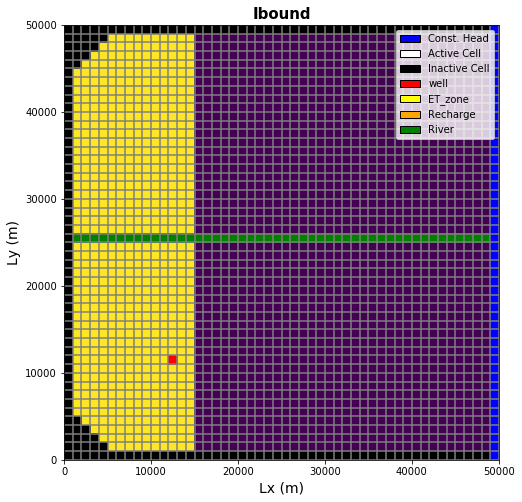

In [156]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

modelmap = flopy.plot.PlotMapView(model=m)
grid = modelmap.plot_grid()
#zones = ET_zone + rech_zone_forced
quadmesh = modelmap.plot_array(rech_zone_forced)
#quadmesh = modelmap.plot_array(rech_zone_forced)

riv_plot = modelmap.plot_bc(ftype='RIV')
quadmesh = modelmap.plot_ibound(ibound[0])
wel = modelmap.plot_bc(ftype='WEL')
#quadmesh = modelmap.plot_array(rech_zone_forced) #, color='purple')
#riv_plot = modelmap.plot_bc(ftype='RIV')
#chd_plot = modelmap.plot_bc(ftype='CHD')
#quadmesh = modelmap.plot_bc('WEL')
quadmesh = modelmap.plot_ibound()



#add labels and legend
plt.xlabel('Lx (m)',fontsize = 14)
plt.ylabel('Ly (m)',fontsize = 14)
plt.title('Ibound', fontsize = 15, fontweight = 'bold')
plt.legend(handles=[mp.patches.Patch(color='blue',label='Const. Head',ec='black'),
                   mp.patches.Patch(color='white',label='Active Cell',ec='black'),
                   mp.patches.Patch(color='black',label='Inactive Cell',ec='black'),
                    mp.patches.Patch(color='red',label='well',ec='black'), 
                   mp.patches.Patch(color='yellow',label='ET_zone',ec='black'),
                    mp.patches.Patch(color='orange',label='Recharge',ec='black'),
                    mp.patches.Patch(color='green',label='River',ec='black')
                   ])

plt.show(modelmap)
#plt.savefig('Domaingrid.png')

### Read in binary files

In [157]:
#hds = bf.HeadFile(modelname+'.hds')                   # reads the binary head file
#times = hds.get_times() # returns a list of timesteps
#times = []
# for t in range(len(perlen)):
#     if t == 0:
#         times.append(perlen[t])
#     else:
#         times.append(times[t-1]+perlen[t])
#print(times)

#head = hds.get_alldata() 
#print(head)
head = {}
leakage = {}
fff = {}
stor = {}
recharge = {}
et = {}
frf = {}
headobj = flopy.utils.binaryfile.HeadFile(modelname+'.hds')
budgobj = flopy.utils.binaryfile.CellBudgetFile(modelname+'.cbc')
times = headobj.get_times()
#print(budgobj.get_unique_record_names())

for stress_per, time in enumerate(times): #iterate through times at end of each stress period
    head['sp%s'%(stress_per)] = headobj.get_data(totim=time) #append heads to head list for ea stress per
    leakage['sp%s'%(stress_per)] = budgobj.get_data(text='RIVER LEAKAGE',totim=time) #append right face flow to frf list for ea stress per
    fff['sp%s'%(stress_per)] = budgobj.get_data(text='FLOW FRONT FACE',totim=time) #append front face flow to fff list for ea stress per
    frf['sp%s'%(stress_per)] = budgobj.get_data(text='flow right face', totim=time)
    stor['sp%s'%(stress_per)] = budgobj.get_data(text='STORAGE',totim=time)
    recharge['sp%s'%(stress_per)] = budgobj.get_data(text='RECHARGE', totim=time) 
    et['sp%s'%(stress_per)] = budgobj.get_data(text='ET', totim=time) 

# print(recharge.keys())
# print(recharge["sp1"])
# print(recharge["sp1199"])

### Plotting Heads

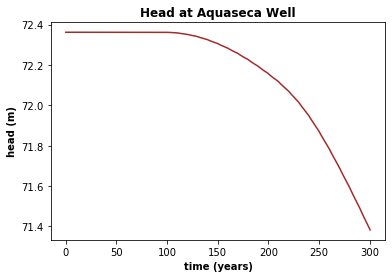

In [158]:
# Aquaseca well
headobj = flopy.utils.binaryfile.HeadFile(modelname+'.hds')

cell_id1 = well_loc #cell at the center of the ag area
time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at Aquaseca Well",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series1[:, 0]/360, time_series1[:, 1], 'b-', color="brown") #plot the time series with points at each record

plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()


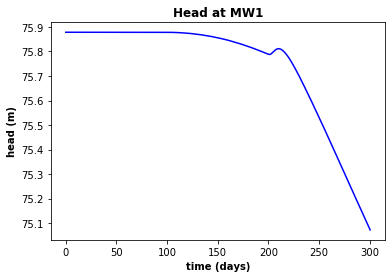

In [159]:
# Monitoring well 1

cell_id1 = well2_loc #cell at the center of the ag area
time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at MW1",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series1[:, 0]/360, time_series1[:, 1], 'b-') #plot the time series with points at each record
# plt.plot(time_series1[900:, 0], time_series1[900:, 1], 'b-') #less data

#plt.savefig("Head_M1_5.png",dpi=600)
plt.show()

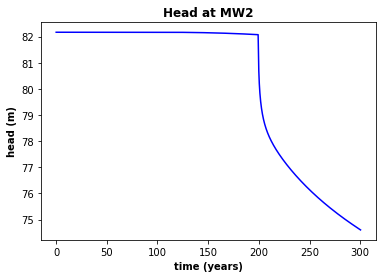

In [160]:
# Monitoring well 2
cell_id1 = well3_loc #cell at the center of the ag area
time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at MW2",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
#plt.ylim(87, 92)
plt.plot(time_series1[:, 0]/360, time_series1[:, 1], 'b-') #plot the time series with points at each record

#plt.savefig("Head_M2_5png", dpi=600)
plt.show()


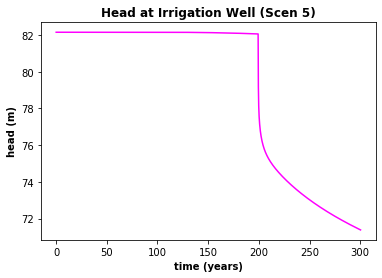

In [161]:
# Irrigation well
cell_id1 = well4_loc #cell at the center of the ag area
time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at Irrigation Well (Scen 5)",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
#plt.ylim(89, 92)
plt.plot(time_series1[:, 0]/360, time_series1[:, 1], 'b-', color="magenta") #plot the time series with points at each record

plt.savefig("Head_irri5"+str(name)+".png", dpi=600)
plt.show()